In [1]:
%matplotlib inline
import sys, os
os.environ['COBAYA_NOMPI'] = 'True'
sys.path.append('/global/cscratch1/sd/sfschen/desi_bao_fitting/lss_likelihood/')

import numpy as np
import matplotlib.pyplot as plt
from cobaya.model import get_model
from cobaya.yaml import yaml_load, yaml_load_file
import yaml

In [2]:
info_txt='/global/cscratch1/sd/sfschen/desi_bao_fitting/martin_reciso.yaml'
#with open(info_txt, 'rb') as fp:
#    info = yaml.load(fp)

info = yaml_load_file(info_txt)

info['packages_path'] = '/global/cscratch1/sd/sfschen/desi_bao_fitting/lss_likelihood/'
info['debug'] = False 
info['stop_at_error'] = True

In [3]:
# Load chains and best fits
base = info['output']

file = np.genfromtxt(base+'.%d.txt'%(1),names=True)
var_names = file.dtype.names
var_names = var_names[2:-4]
del file

In [4]:
mcmc = []

for ii in range(8):
    mcmc += [ np.loadtxt(base+'.%d.txt'%(ii+1)) ]

mcmc = np.concatenate(mcmc)

In [5]:
chi2s = mcmc[:,-1]
ii = np.argmin(chi2s)
bfs = mcmc[ii,2:-4]
pars = dict(zip(var_names,bfs))

In [6]:
# Run Model Class
model = get_model(info)

#bounds = model.prior.bounds()
#pars = dict(zip(model.prior.params, model.prior.reference()))
logposterior = model.logposterior(pars)
print(logposterior)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']
(10.12025882175815, 9.332620656917147, 10.128518651354545, 13.685592617083431, 0.03169562702463055)
LogPosterior(logpost=-134.20190247580499, logpriors=[-129.86854476952155], loglikes=array([-4.33335771]), derived=[])


In [11]:
chi2 = -model.logps(pars)[0] * 2
print(chi2)

[8.66671541]


In [8]:
likelihood_name = list(model.likelihood.keys())[0]

kdat = model.likelihood[likelihood_name].kdat
p0dat = model.likelihood[likelihood_name].p0dat
p2dat = model.likelihood[likelihood_name].p2dat
errs = np.diag(model.likelihood[likelihood_name].cov)**0.5

In [9]:
p0conv, p2conv = model.likelihood[likelihood_name].p0conv, model.likelihood[likelihood_name].p2conv

Text(0.5, 1.0, 'best fit: mock_likelihoods.Martin_RecIso')

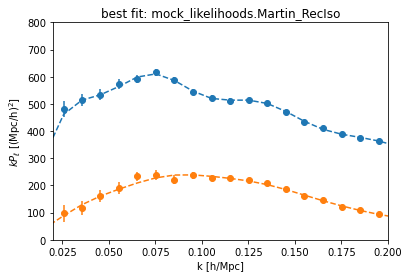

In [10]:
plt.errorbar(kdat, kdat * p0dat, yerr=kdat * errs[:48], fmt = 'o')
plt.errorbar(kdat, kdat * p2dat, yerr=kdat * errs[48:], fmt = 'o')

plt.plot(kdat, kdat * p0conv, 'C0--')
plt.plot(kdat, kdat * p2conv, 'C1--')

plt.xlim(0.02,0.2)
plt.ylim(0,800)

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell$ [(Mpc/h)$^2$]')

plt.title('best fit: ' + likelihood_name)